In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Market+Risk+Dataset (1).csv")

In [4]:
df

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...,...
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '')

In [6]:
df.shape

(314, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [8]:
df.isnull().sum()

Date                   0
Infosys                0
Indian_Hotel           0
Mahindra_&_Mahindra    0
Axis_Bank              0
SAIL                   0
Shree_Cement           0
Sun_Pharma             0
Jindal_Steel           0
Idea_Vodafone          0
Jet_Airways            0
dtype: int64

In [9]:
df.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


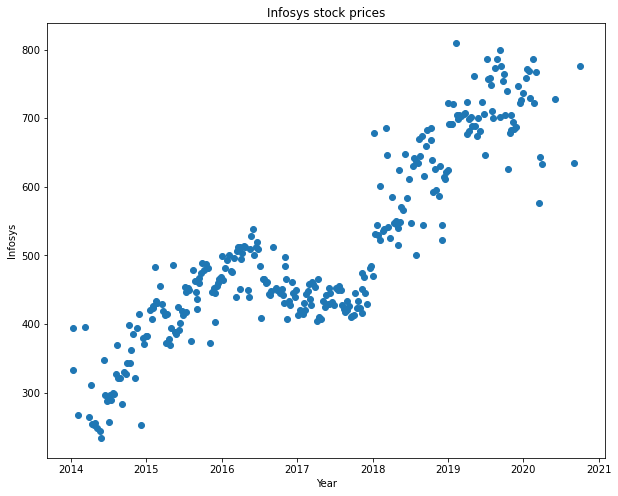

In [10]:
plt.figure(figsize = (10, 8))
df['dates'] = [pd.to_datetime(d) for d in df['Date']]
plt.scatter(df['dates'], df['Infosys'])
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys stock prices')
plt.show()

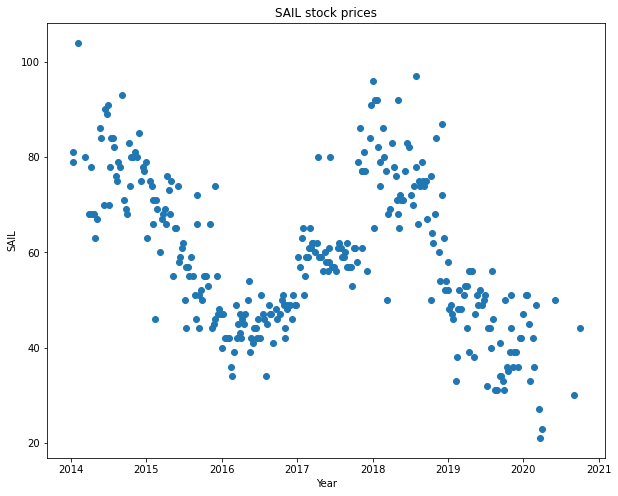

In [11]:
plt.figure(figsize = (10, 8))
df['dates'] = [pd.to_datetime(d) for d in df['Date']]
plt.scatter(df['dates'], df['SAIL'])
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL stock prices')
plt.show()

## Stock returns

In [20]:
stock_returns = np.log(df.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [21]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [22]:
stock_returns.shape

(314, 10)

In [23]:
stock_returns.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.002794,0.000266,-0.001506,0.001167,-0.003463,0.003681,-0.001455,-0.004123,-0.010608,-0.009548
std,0.035070,0.047131,0.040169,0.045828,0.062188,0.039917,0.045033,0.075108,0.104315,0.097972
min,-0.167300,-0.236389,-0.285343,-0.284757,-0.251314,-0.129215,-0.179855,-0.283768,-0.693147,-0.458575
25%,-0.014514,-0.023530,-0.020884,-0.022473,-0.040822,-0.019546,-0.020699,-0.049700,-0.045120,-0.052644
50%,0.004376,0.000000,0.001526,0.001614,0.000000,0.003173,0.001530,0.000000,0.000000,-0.005780
75%,0.024553,0.027909,0.019894,0.028522,0.032790,0.029873,0.023257,0.037179,0.024391,0.036368
max,0.135666,0.199333,0.089407,0.127461,0.309005,0.152329,0.166604,0.243978,0.693147,0.300249


In [24]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [25]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [26]:
df_stocks = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df_stocks

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


In [36]:
df = df.drop(['Date','dates'],axis=1)

In [37]:
df

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,264,69,455,263,68,5543,555,298,83,278
1,257,68,458,276,70,5728,610,279,84,303
2,254,68,454,270,68,5649,607,279,83,280
3,253,68,488,283,68,5692,604,274,83,282
4,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...
309,729,120,469,658,33,23110,401,146,3,22
310,634,114,427,569,30,21308,384,121,6,18
311,577,90,321,428,27,18904,365,105,3,16
312,644,75,293,360,21,17666,338,89,3,14


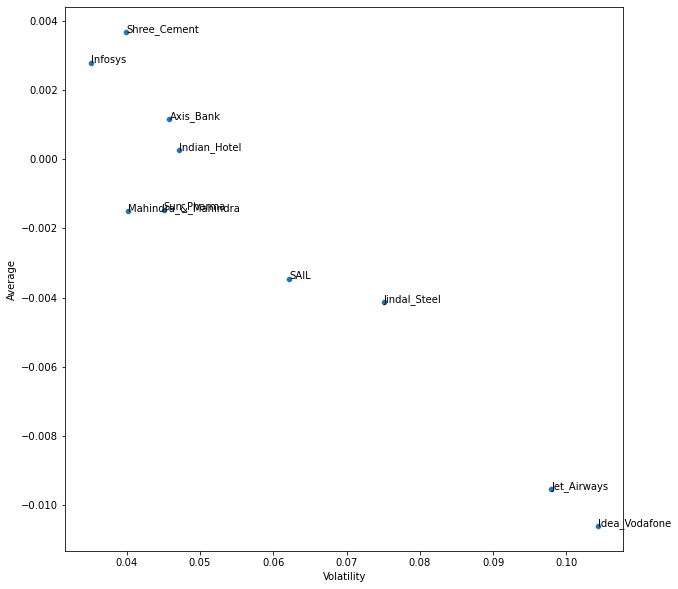

In [44]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(df_stocks['Volatility'], df_stocks['Average'])

X = df_stocks['Volatility']
Y = df_stocks['Average']



for i, label in enumerate(df.columns):
    plt.annotate(label, (X[i], Y[i]))

plt.show()